In [1]:
import matplotlib.pyplot as plt
import zarr
import numpy as np

In [2]:
egg = zarr.open("./SK1-1.zarr")

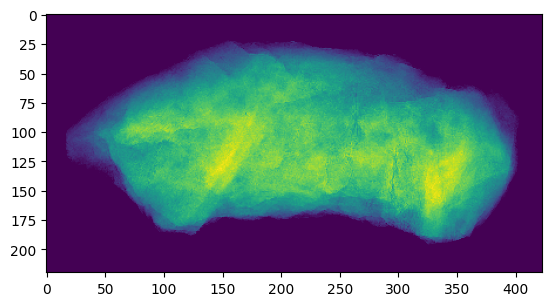

In [17]:
plt.imshow(np.sum(egg[:, ::8,::8], axis=0), vmin=250000)
# plt.colorbar()

In [18]:
from typing import Optional, Union, List
import numpy as np
import neuroglancer

_IMAGE_DTYPES = {"uint8", "uint16", "float32", "float64"}
_SEGMENTATION_DTYPES = {"uint32", "uint64"}


class Anyglancer:
    def __init__(
        self,
        data_volumes: Union[np.ndarray, List[np.ndarray]],
        layer_names: Optional[List[str]] = None,
    ):
        if isinstance(data_volumes, np.ndarray):
            data_volumes = [data_volumes]
        if layer_names is None:
            layer_names = [f"layer_{i}" for i in range(len(data_volumes))]
        self.data_volumes = data_volumes
        self.layer_names = layer_names
        self.viewer = None

    def show(self):
        if self.viewer is None:
            self.viewer = neuroglancer.Viewer()
            with self.viewer.txn() as s:
                for layer_name, data_volume in zip(self.layer_names, self.data_volumes):
                    if str(data_volume.dtype) in _IMAGE_DTYPES:
                        s.layers[layer_name] = neuroglancer.ImageLayer(
                            source=neuroglancer.LocalVolume(
                                data=data_volume,
                                dimensions=neuroglancer.CoordinateSpace(
                                    names=["x", "y", "z"], units="nm", scales=[1, 1, 1]
                                ),
                            )
                        )
                    elif str(data_volume.dtype) in _SEGMENTATION_DTYPES:
                        s.layers[layer_name] = neuroglancer.SegmentationLayer(
                            source=neuroglancer.LocalVolume(
                                data=data_volume,
                                dimensions=neuroglancer.CoordinateSpace(
                                    names=["x", "y", "z"], units="nm", scales=[1, 1, 1]
                                ),
                            )
                        )

        return self.viewer


In [20]:
Anyglancer([
    zarr.open("./SK1-1.zarr"),
    zarr.open("./SK1-1-seg.zarr")[:,:,:].astype(np.uint64),
]).show()

http://127.0.0.1:57668/v/bc3400ff596b2375ec55d7c8391ff903c5ef517f/

: 

In [ ]:
xyz_offset =(202,120,308)
# pad the volume with zeros in the lower XYZ corner:
# (0,0,0) -> (202,120,308)
np.pad(egg, xyz_offset,